# Parallell computing test

In [8]:
import sys
print(sys.path)
sys.path.append('../')

import numpy as np
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt

['', '/home/joshy/anaconda3/envs/jupyter/lib/python36.zip', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6/lib-dynload', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6/site-packages', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6/site-packages/DicomBrowser-1.3.0-py3.6.egg', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6/site-packages/pydicom-1.1.0-py3.6.egg', '/home/joshy/github/cornerstone_widget', '/home/joshy/anaconda3/envs/jupyter/lib/python3.6/site-packages/IPython/extensions', '/home/joshy/.ipython', '../']


In [2]:
from copd.loader import load_exam
from copd.segmentation_watershed import segment as wsegment
example = "../data/example_5"
patient, imgs = load_exam(example)

/home/joshy/anaconda3/envs/jupyter/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
masked_lung, mask = wsegment(imgs)

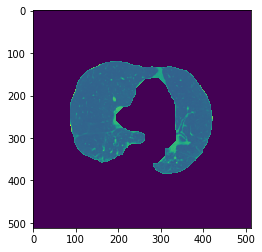

In [4]:
plt.imshow(masked_lung[140])

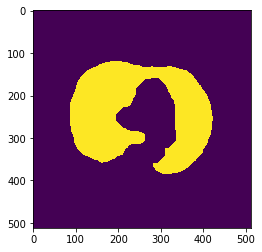

In [5]:
plt.imshow(mask[140])

In [24]:
nifti = nib.load("5_thorax___10__i26f__3.nii.gz")
print(nifti.affine)

[[ -0.75         0.           0.         200.625     ]
 [ -0.           0.75         0.         -44.625     ]
 [  0.          -0.           1.          94.69999695]
 [  0.           0.           0.           1.        ]]


In [25]:
print(nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 303   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.    0.75  0.75  1.    1.    1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 200.625
qoffset_y       : -44.625
qoffset_z       : 94.7
srow_x          : [ -0.7

In [73]:
stacked = np.stack(mask, -1).astype(np.uint16)
stacked = stacked[:,:,::-1]
stacked = np.swapaxes(stacked, 0,1)
stacked = stacked[:,::-1,:]
nifti_image = nib.Nifti1Image(stacked, header=nifti.header, affine=nifti.affine)
nib.save(nifti_image, 'lung_mask_zud.nii.gz')

In [43]:
print(nifti_image.header.get_data_shape())

(0, 512, 303)
